In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score , classification_report

#DATA EXPLORATION

In [ ]:
df_Stroke = pd.read_csv('/content/brain_stroke.csv')
df_Stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [ ]:
df_Stroke.shape

(4981, 11)

In [ ]:
df_Stroke.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
df_Stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
df_Stroke.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [ ]:
df_Stroke.duplicated().sum()

0

In [ ]:
df_Stroke.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df_Stroke['stroke'].value_counts()

stroke
0    4733
1     248
Name: count, dtype: int64

In [ ]:
df_Stroke['stroke'].replace({0: 'The patient did not have a stroke', 1: 'The patient had a stroke'}, inplace=True)

In [ ]:
df_Stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,The patient had a stroke
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,The patient had a stroke
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,The patient had a stroke
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,The patient had a stroke
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,The patient had a stroke


#DATA VISUALIZATION

In [ ]:
df_cat=df_Stroke[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type',
                 'smoking_status', 'stroke']]

<ipython-input-13-9b00ae05a750>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_cat[i], data = df_cat, palette = 'hls')


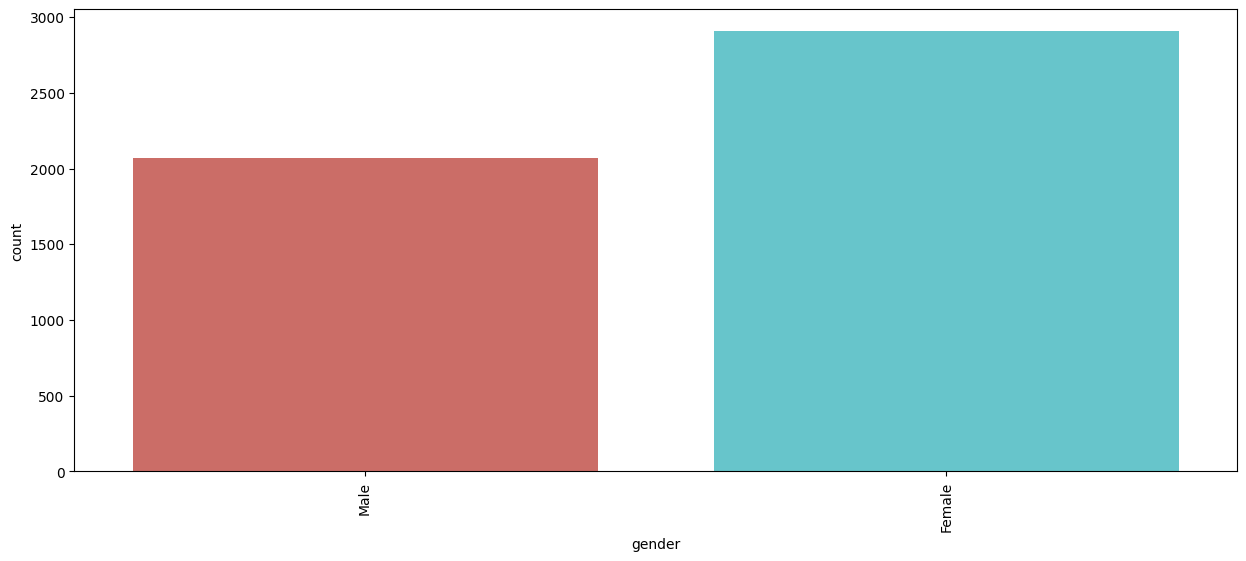

<ipython-input-13-9b00ae05a750>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_cat[i], data = df_cat, palette = 'hls')


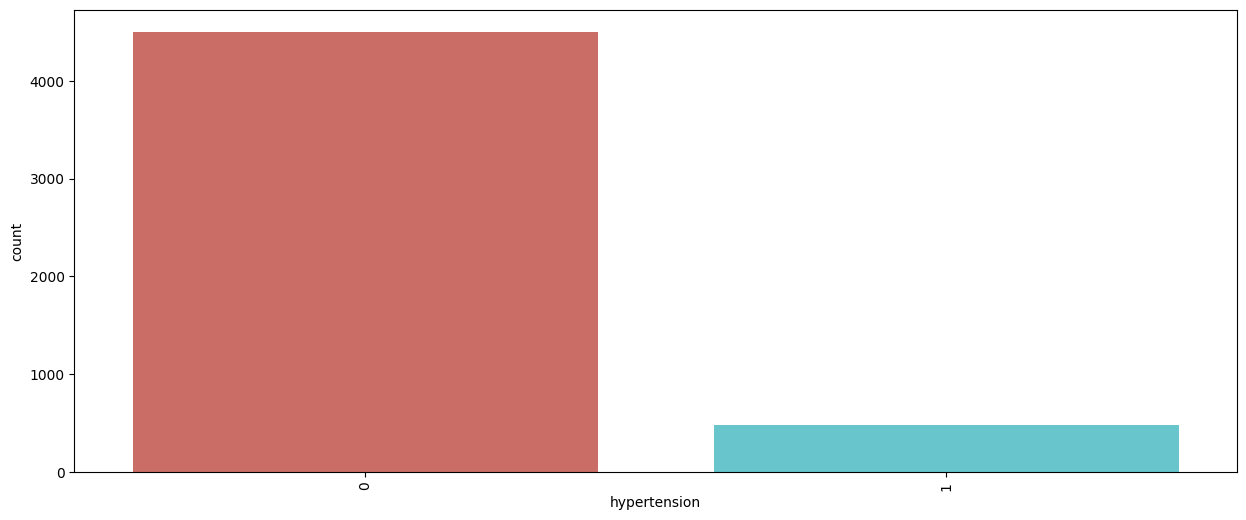

<ipython-input-13-9b00ae05a750>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_cat[i], data = df_cat, palette = 'hls')


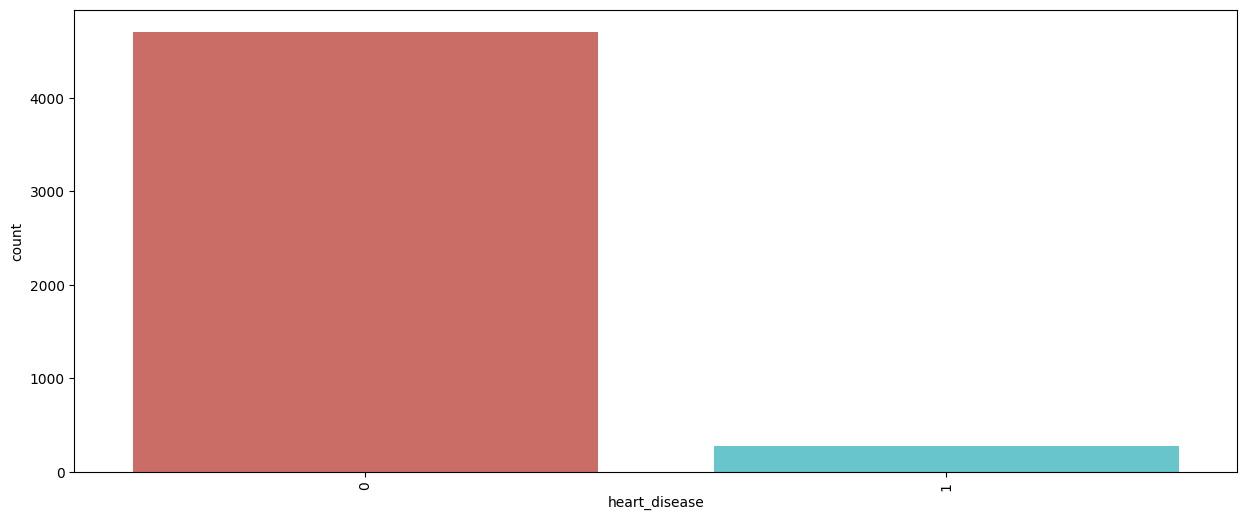

<ipython-input-13-9b00ae05a750>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_cat[i], data = df_cat, palette = 'hls')


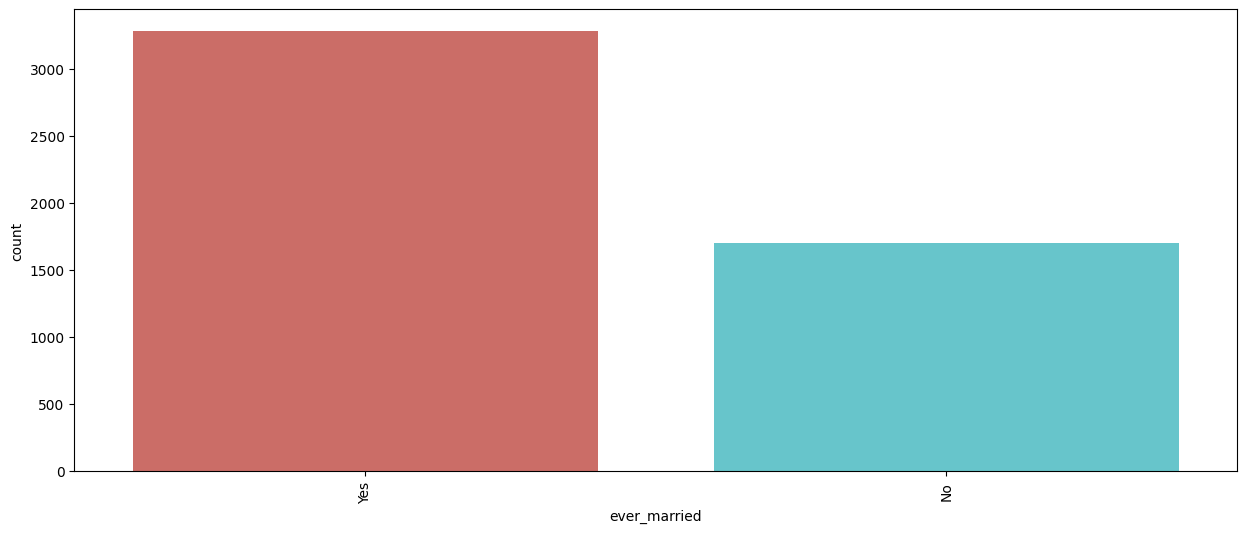

<ipython-input-13-9b00ae05a750>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_cat[i], data = df_cat, palette = 'hls')


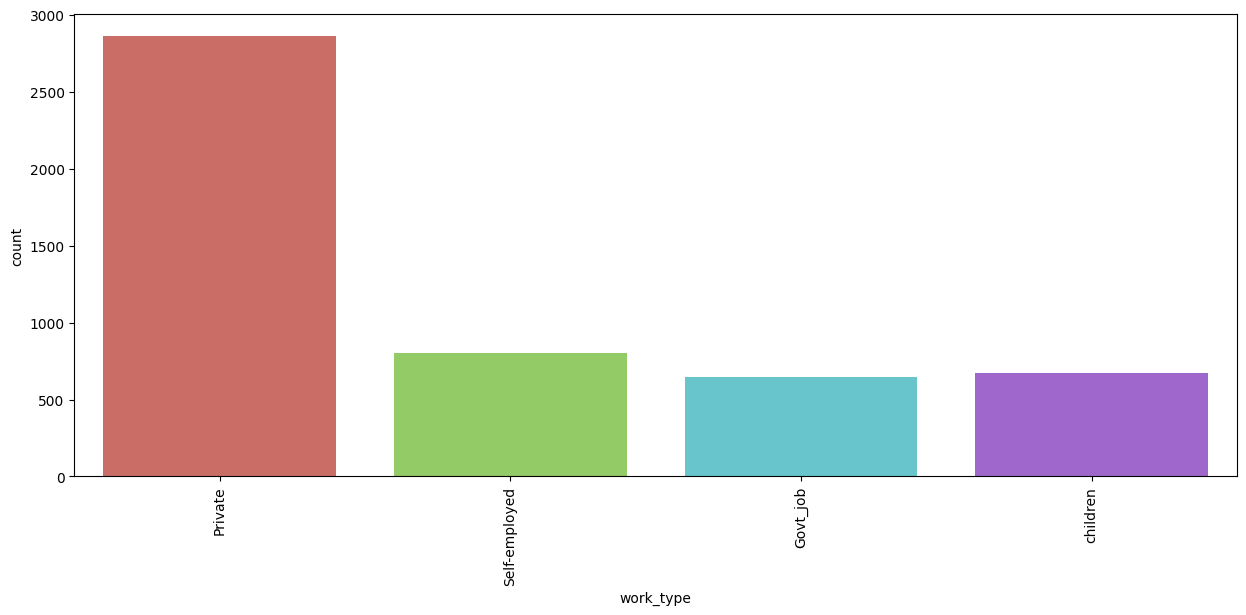

<ipython-input-13-9b00ae05a750>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_cat[i], data = df_cat, palette = 'hls')


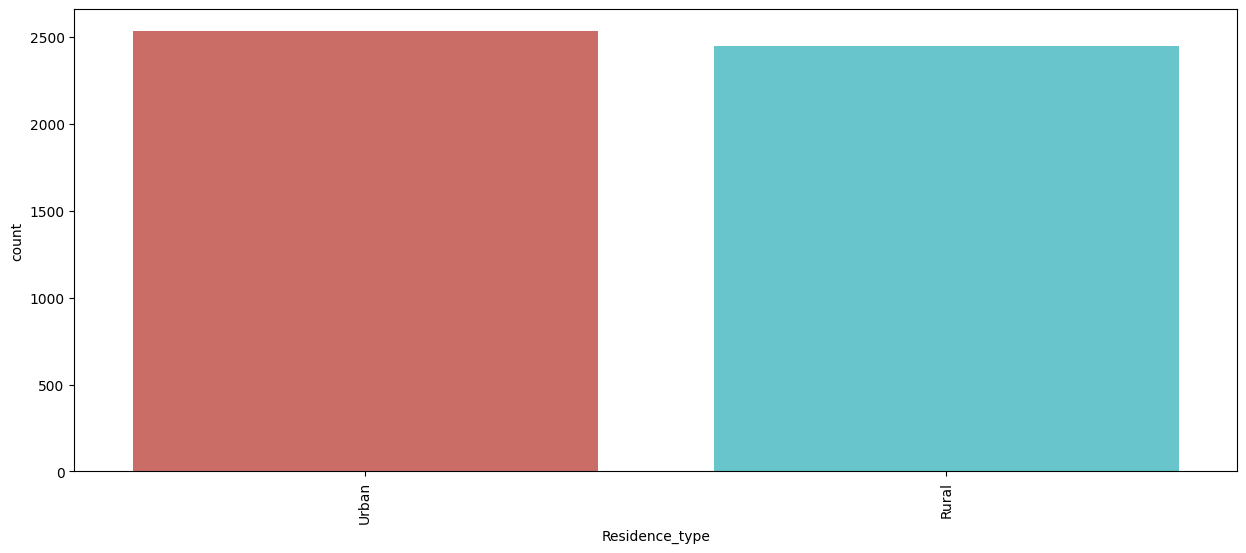

<ipython-input-13-9b00ae05a750>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_cat[i], data = df_cat, palette = 'hls')


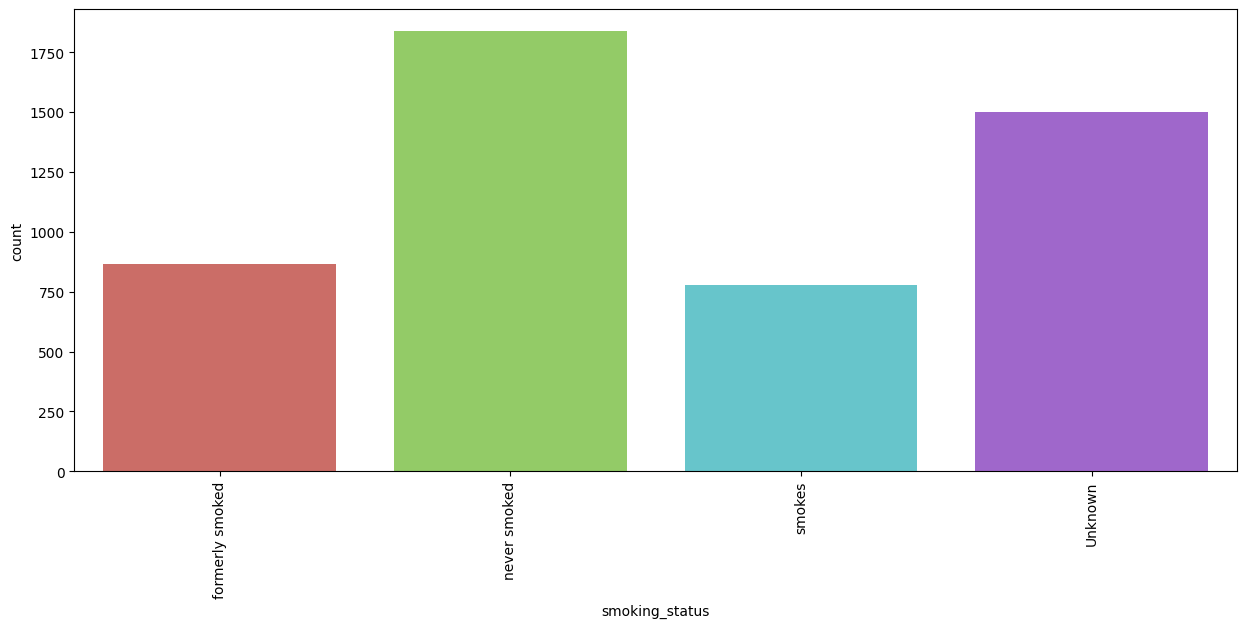

<ipython-input-13-9b00ae05a750>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_cat[i], data = df_cat, palette = 'hls')


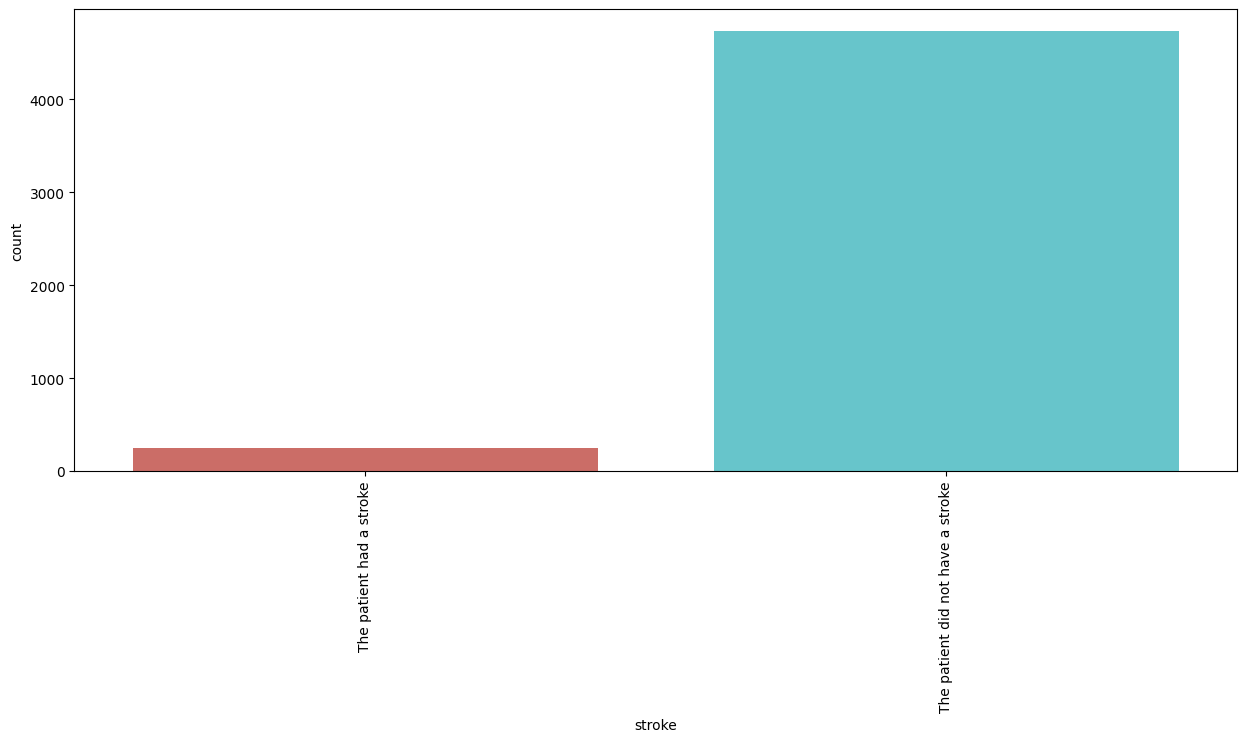

In [ ]:
for i in df_cat.columns:
    plt.figure(figsize = (15,6))
    sns.countplot(x=df_cat[i], data = df_cat, palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

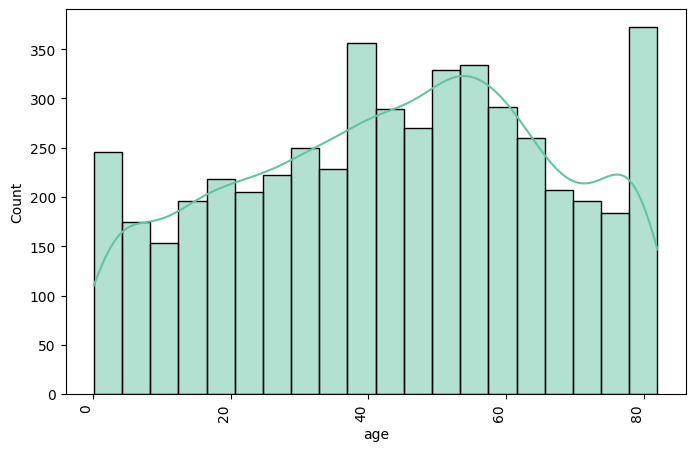

In [ ]:
plt.figure(figsize=(8, 5))
palette = sns.color_palette("Set2")
sns.histplot(df_Stroke['age'], kde=True, color=palette[0])
plt.xticks(rotation=90, ha="right")
plt.show()

<Figure size 2000x1000 with 0 Axes>

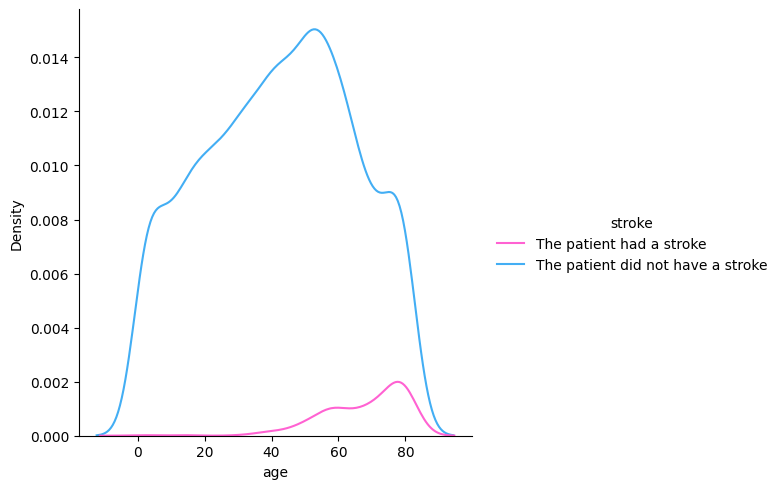

In [ ]:
my_palette = ["#FF62D2", "#43AEF4"]

plt.figure(figsize=(20,10))

sns.displot(data=df_Stroke, x="age", hue="stroke", kind="kde",palette=my_palette)

(array([-20.,   0.,  20.,  40.,  60.,  80., 100.]),
 [Text(-20.0, 0, '−20'),
  Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100')])

<Figure size 2000x1000 with 0 Axes>

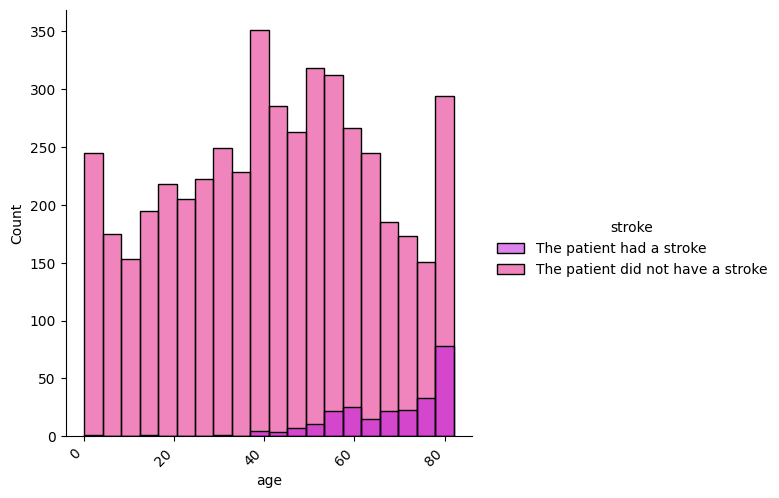

In [ ]:
plt.figure(figsize=(20,10))
palette = sns.color_palette(["#BA0ADA" , "#E20C7E"])
sns.displot(data=df_Stroke, x="age", hue="stroke",bins=20, palette=palette)
plt.xticks(rotation=45, ha="right")

<Axes: ylabel='Density'>

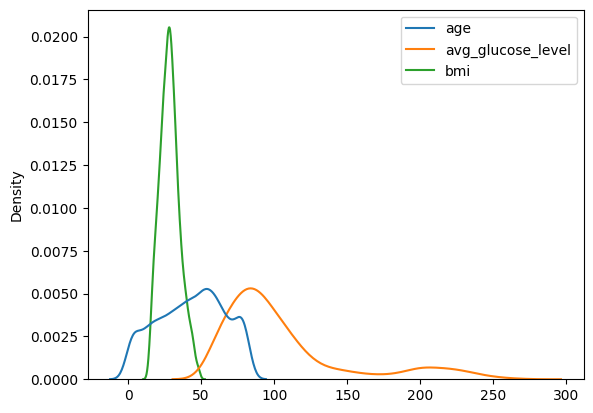

In [ ]:
numerical_data = df_Stroke[['age','avg_glucose_level','bmi']]
sns.kdeplot(data=numerical_data)

<ipython-input-18-a61615e500a1>:3: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.displot(data=df_Stroke, x="work_type", hue="stroke",bins=20, palette=palette)


([0, 1, 2, 3],
 [Text(0, 0, 'Private'),
  Text(1, 0, 'Self-employed'),
  Text(2, 0, 'Govt_job'),
  Text(3, 0, 'children')])

<Figure size 1200x800 with 0 Axes>

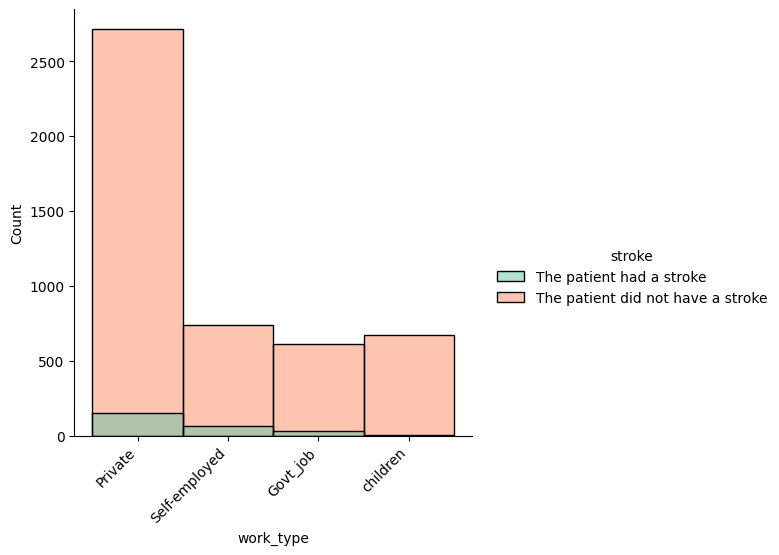

In [ ]:
plt.figure(figsize=(12,8))
palette = sns.color_palette("Set2")
sns.displot(data=df_Stroke, x="work_type", hue="stroke",bins=20, palette=palette)
plt.xticks(rotation=45, ha="right")

#ANALYSIS DATA

In [ ]:
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df_Stroke.columns:
    if df_Stroke[col].dtype=='object':
        df_Stroke[col]=le.fit_transform(df_Stroke[col])

In [ ]:
df_Stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1


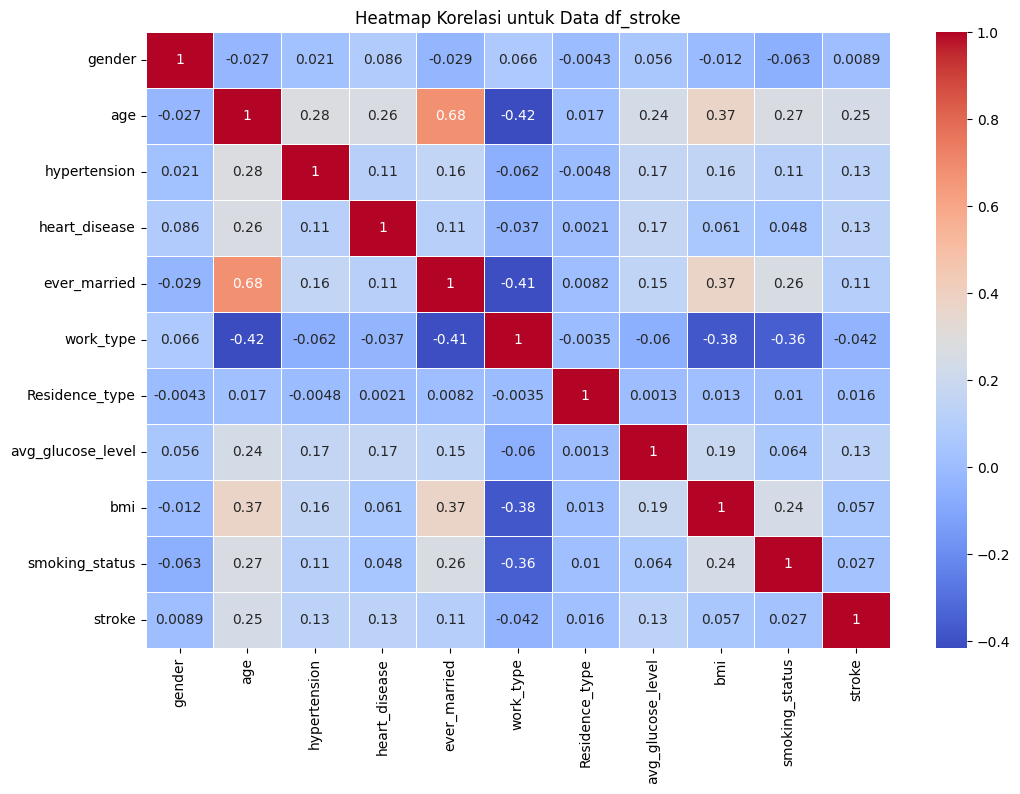

In [ ]:
corr_matrix = df_Stroke.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi untuk Data df_stroke')
plt.show()

In [ ]:
X = df_Stroke[['age', 'hypertension']]
y =df_Stroke['stroke']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=True)

#Decisiontreeclassifier

In [ ]:
dec_clf=DecisionTreeClassifier(criterion='gini',random_state=3,max_depth=5)
dec_clf.fit(X_train,y_train)
y_pred=dec_clf.predict(X_test)
print('DecisionTreeClassifier accuracy score:', dec_clf.score(X_test, y_test)*100)
print(classification_report(y_test, y_pred))

DecisionTreeClassifier accuracy score: 94.78260869565217
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1417
           1       0.00      0.00      0.00        78

    accuracy                           0.95      1495
   macro avg       0.47      0.50      0.49      1495
weighted avg       0.90      0.95      0.92      1495



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


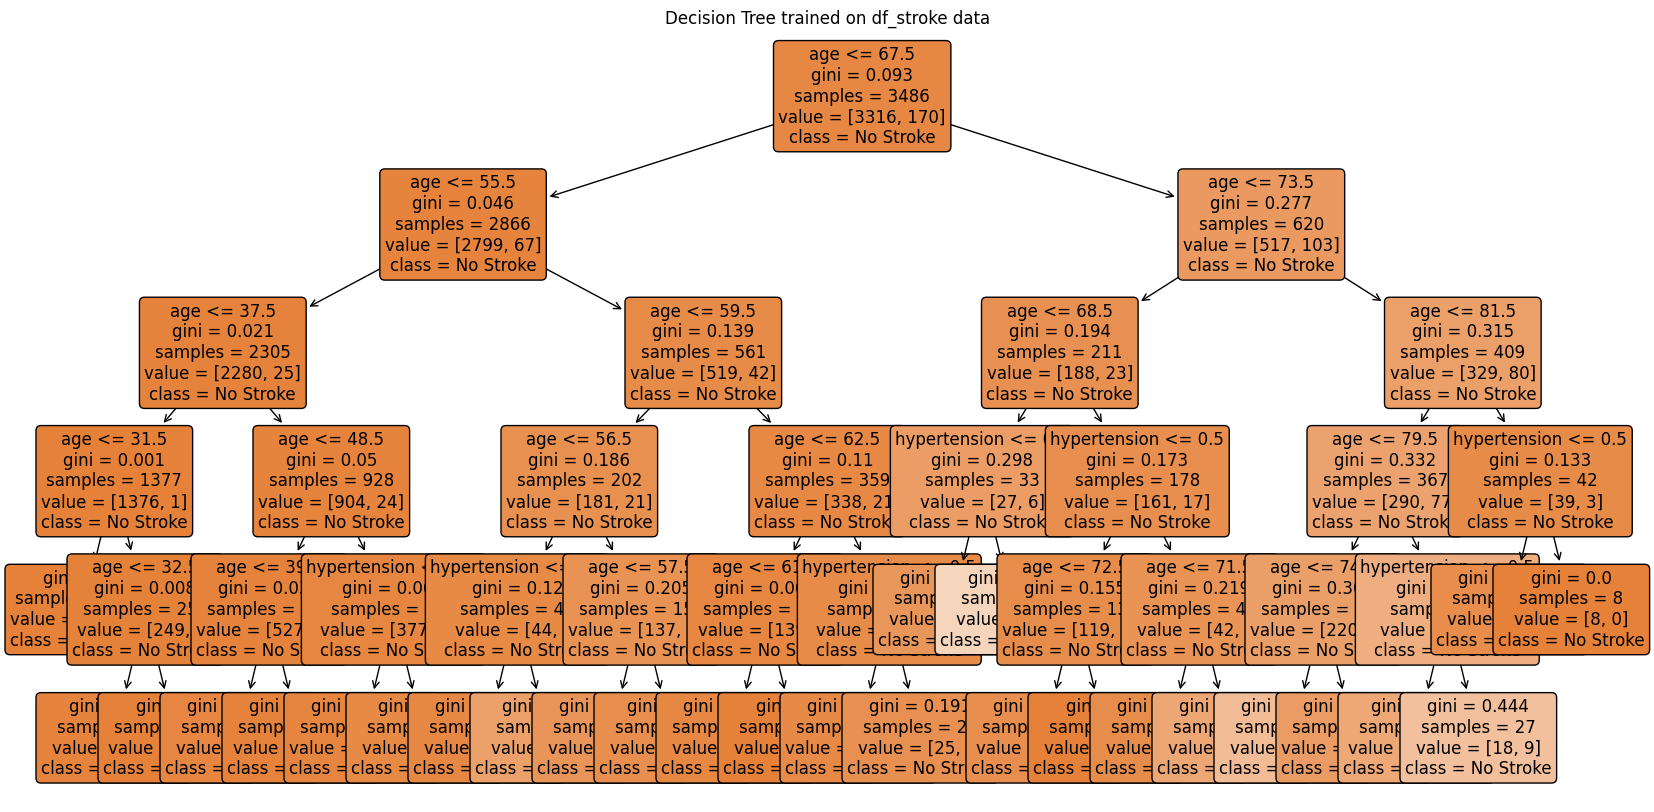

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(dec_clf, filled=True, feature_names=X.columns, class_names=['No Stroke', 'Stroke'], rounded=True, fontsize=12)
plt.title("Decision Tree trained on df_stroke data")
plt.show()

#NaiveBayes

In [ ]:
NaiveBayes=GaussianNB()
NaiveBayes.fit(X_train,y_train)
y_pred=NaiveBayes.predict(X_test)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(y_pred,y_test))
print(classification_report(y_test, y_pred))

The accuracy of the NaiveBayes is 0.8976588628762542
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1417
           1       0.19      0.29      0.23        78

    accuracy                           0.90      1495
   macro avg       0.58      0.61      0.59      1495
weighted avg       0.92      0.90      0.91      1495



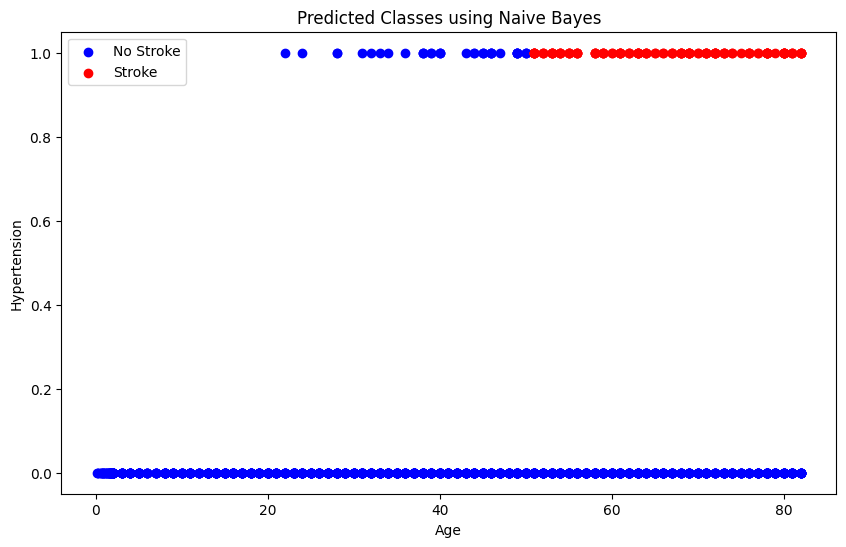

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test[y_pred == 0]['age'], X_test[y_pred == 0]['hypertension'], c='blue', label='No Stroke')
plt.scatter(X_test[y_pred == 1]['age'], X_test[y_pred == 1]['hypertension'], c='red', label='Stroke')
plt.xlabel('Age')
plt.ylabel('Hypertension')
plt.title('Predicted Classes using Naive Bayes')
plt.legend()
plt.show()

#Evaluation Data

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
cv_mean=[]
accuracy=[]
std=[]
classifiers=['Decision Tree','Naive Bayes']
models=[DecisionTreeClassifier(), GaussianNB()]
for model, classifier in zip(models, classifiers):
    cv_result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    cv_mean.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':cv_mean,'Std':std},index=classifiers)
new_models_dataframe2


,CV Mean,Std
Decision Tree,0.949883,0.124539
Naive Bayes,0.886228,0.105341


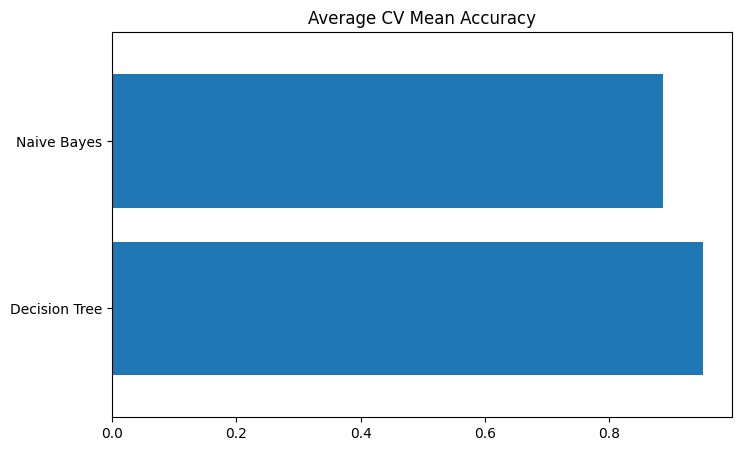

In [ ]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()